# Challenge 1: Breast Cancer Dataset EDA

### Import necessary Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from six.moves import urllib
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import numpy as np

## Exploratory Data Analysis

### Load the dataset into Pandas Dataframe

In [2]:
names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', sep = ',', names=names )
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Analyze the dataframe

The info function gives information on each column present in the dataframe.
From the analysis, we can observe that none of the coulumns have null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

The describe() function gives the descriptive statistics of the dataframe. This includes the count, standard deviation, minimum values and the percentiles for each feature.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### Analysis of the perimeter feature

The mean, median and standard deviation of the perimeter feature that is stored as a dataframe for better analysis.

In [5]:
df_perimeter_summary = pd.DataFrame({
      'feature': ['perimeter_mean','perimeter_se','perimeter_worst'],
      'mean': [df['perimeter_mean'].mean(),df['perimeter_se'].mean(),df['perimeter_worst'].mean()],
      'median': [df['perimeter_mean'].median(),df['perimeter_se'].median(),df['perimeter_worst'].median()],
      'std': [df['perimeter_mean'].std(),df['perimeter_se'].std(),df['perimeter_se'].std()]
})
df_perimeter_summary

,feature,mean,median,std
0,perimeter_mean,91.969033,86.240,24.298981
1,perimeter_se,2.866059,2.287,2.021855
2,perimeter_worst,107.261213,97.660,2.021855


### Visualization of the above results in form of a plot

This gives a better analysis and visualization of the variation between the raw data, mean, median and standard deviation of the perimeter feature.

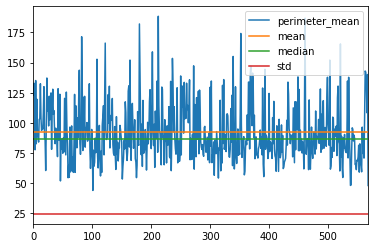

In [6]:
data_perimeter_mean=df['perimeter_mean'].tolist()
df_perimeter_mean = pd.DataFrame({
      'perimeter_mean': data_perimeter_mean,
      'mean': [df['perimeter_mean'].mean() for i in range(len(data_perimeter_mean))],
      'median': [df['perimeter_mean'].median() for i in range(len(data_perimeter_mean))],
      'std': [df['perimeter_mean'].std() for i in range(len(data_perimeter_mean))]
})
df_perimeter_mean.plot()
plt.show()

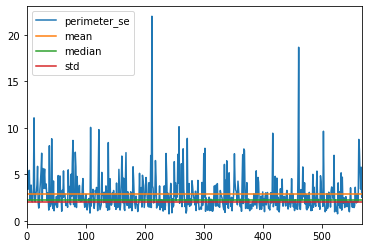

In [7]:
data_perimeter_se=df['perimeter_se'].tolist()
df_perimeter_se = pd.DataFrame({
      'perimeter_se': data_perimeter_se,
      'mean': [df['perimeter_se'].mean() for i in range(len(data_perimeter_se))],
      'median': [df['perimeter_se'].median() for i in range(len(data_perimeter_se))],
      'std': [df['perimeter_se'].std() for i in range(len(data_perimeter_se))]
})
df_perimeter_se.plot()
plt.show()

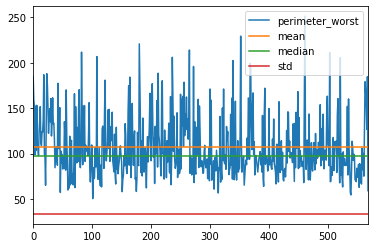

In [8]:
data_perimeter_worst=df['perimeter_worst'].tolist()
df_perimeter_worst = pd.DataFrame({
      'perimeter_worst': data_perimeter_worst,
      'mean': [df['perimeter_worst'].mean() for i in range(len(data_perimeter_worst))],
      'median': [df['perimeter_worst'].median() for i in range(len(data_perimeter_worst))],
      'std': [df['perimeter_worst'].std() for i in range(len(data_perimeter_worst))]
})
df_perimeter_worst.plot()
plt.show()

### Distribution of the radius feature

#### Normaility Assessment 1: Histogram and KDE plot

To understand how well the radius_mean feature is normally distributed, we plot a histogram and kernel density estimator. Further it helps us inspect if the dataset has underlying skewness, outliers etc. In case of the readius feature, the data is slightly skewed on the right.

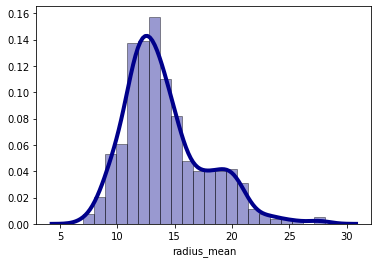

In [9]:

sns.distplot(df['radius_mean'], hist=True, kde=True, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})

#### Normality Assessment 2: Probability Plot

For deeper understanding on how well the data is normally distributed, we make use of the Probability Plots. This is formed by ploting the sorted data values against the theoretical quantile values. This is another method for determining the presence of outliers, skewness in the dataset. The data is said to be normally distributed if the data points are along a staright line in the probability plot.

On plotting the radius feature, we observe that the data is skewed on left and right side. There also exists some outliers. Hence, we can say that the data is not normally distibuted


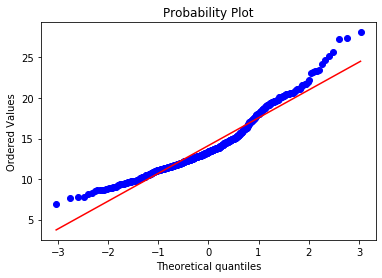

In [10]:

stats.probplot(df['radius_mean'], dist="norm", plot=plt)
plt.show()

#### Finding the most appropriate distribution using Kolmogorov–Smirnov test

The Kolmogorov-Smirnov test is one of the widely is used methods to identify the most suitable distribution. The test returns a statiscal and a p-value which should be interpreted using the K-S table (https://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/). 

In the below case, we find perform the distribution for each distribution and sort the values in ascendig order. Since we have 569 datapoints, we look at the last row in the table. For a significance level of 0.05, the critical value is wa above statistical value for the weibull_max distribution. Hence, we can say that our dataset best fits the weibull_max distribution.

In [11]:
dists = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang','logistic','cauchy']
results = []
for i in dists:
    dist = getattr(stats, i)
    p = dist.fit(df['radius_mean'])
    a = stats.kstest(df['radius_mean'], i, args=p)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


weibull_max: statistic=0.04231753854337916, pvalue=0.25334821633502297
lognorm: statistic=0.045725585880584174, pvalue=0.17962386339996833
invgauss: statistic=0.04761053035789109, pvalue=0.14683037191786177
gamma: statistic=0.05501207463636737, pvalue=0.06151407677327125
pearson3: statistic=0.055015116925077545, pvalue=0.06149050135638735
beta: statistic=0.055033569133057014, pvalue=0.061347676495453606
logistic: statistic=0.06977060858134487, pvalue=0.007469099201699841
cauchy: statistic=0.10905740556757462, pvalue=2.3873659785450825e-06
norm: statistic=0.11273020428287472, pvalue=9.379762733102699e-07
triang: statistic=0.1889093939256682, pvalue=2.9702731350787952e-18
expon: statistic=0.28395006230749675, pvalue=4.3468101733843e-41
uniform: statistic=0.3357488242157285, pvalue=1.056667697927804e-57
weibull_min: statistic=0.704246625257981, pvalue=4.531801129650808e-284


## Training the Classifier

In this section, we will train the 2 classifiers and evaluate how well it predicts the diagnosis feature (M or B). 

### Split the datset into Train and Test

1) Split the dataset into X which contains all the features and y, which contains the labels to be predicted.

2) Convert the labels into binary form (1-Malignant, 0- Benign) using LabelEncoder.

3) Split the dataset into 80% Train and 20% Test data.

4) Standardize the train data and test data using StandardScaler().

In [13]:
X = df.iloc[:,2:].values
y = df.iloc[:, 1:2].values

In [14]:
X.shape

(569, 30)

In [15]:
y.shape

(569, 1)

In [16]:
le = LabelEncoder()
y = le.fit_transform(y.ravel())

In [17]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [18]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [19]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

### Train a Logistic Regression Classifier

Logistic Regession is the most widely used Binary Classifier. This is based on the concept of Probability. For classifcation purpose, the Logictic Classifier makes use of a cost function called Sigmoid Function which is limited between 0 and 1.

The Scikit Learn package provides an inbulit function called LogisticRegression to perform the classification. The Training data and labels are trained using the fit function. Using the predict function, we predict the labels of  the test data.


In [26]:

classifier = LogisticRegression(penalty='l1', solver='saga', max_iter= 5000) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


### Evaluate the predictions

#### 1) Accuracy of the score:
Using the classifier.score function, we can evaulate how well the model predicted the values on the test data.

Accuracy= Number of correct observations/Total number of observations.

From below score, we observe that the model predicted the lables with 97.4% Accuracy.

#### 2) Confusion Matrix:

It is a table that describes the performance of the classification model. It is divided into True Positive, False Positive, True Negative, False Negative that describe which are correctly classified and which are not.

#### 3) Classification Report:

Another way to measure the quality of predictions. This report gives different measures such as Accuracy, Precision, Recall etc.

#### 4) HeatMap:

A better way to visualize the confusion Matrix.


In [27]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.974


In [28]:

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix for the test data: \n")
print(confusion_matrix)

Confusion matrix for the test data: 

[[72  0]
 [ 3 39]]


In [29]:
print("\n Classification report:\n\n"+classification_report(y_test, y_pred))


 Classification report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



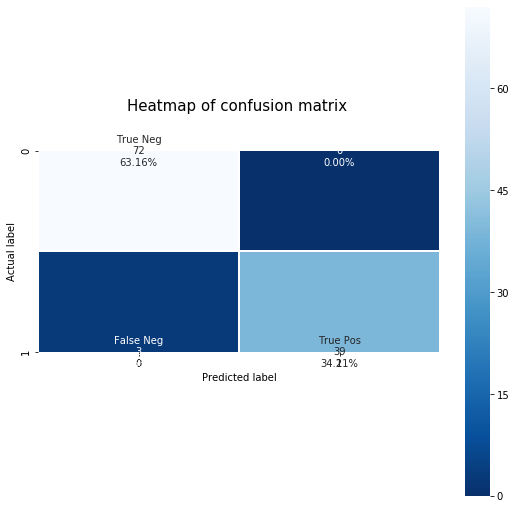

In [30]:

plt.figure(figsize=(9,9))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt="", linewidths=.5, square = True, cmap = 'Blues_r',xticklabels=True, yticklabels=True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Heatmap of confusion matrix \n\n', size = 15);


### Train a Support Vector Classifier

SVC is classifier that fits the data by provideing a best fit hyperplane to categorize the labels. After getting the hyperplane, we can feed some features to predict the class.

The Scikit Learn package provides an inbuilt called SVC to perform the classification. The Training data and labels are trained using the fit function. Using the predict function, we predict the labels of  the test data.

In [37]:

classifier2 = SVC(C= 1, gamma= 0.8, kernel= 'linear', random_state= 0)
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)


### Evaluate the predictions

In [38]:
print('Accuracy of SVC classifier on test set: {:.3f}'.format(classifier2.score(X_test, y_test)))

Accuracy of SVC classifier on test set: 0.965


In [43]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print("Confusion matrix for the test data: \n")
print(confusion_matrix2)

Confusion matrix for the test data: 

[[71  1]
 [ 3 39]]


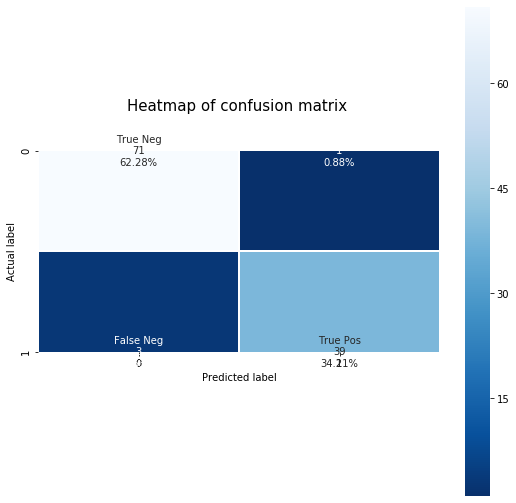

In [44]:

plt.figure(figsize=(9,9))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix2.flatten()/np.sum(confusion_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix2, annot=labels, fmt="", linewidths=.5, square = True, cmap = 'Blues_r',xticklabels=True, yticklabels=True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Heatmap of confusion matrix \n\n', size = 15);

## Conclusion

From the comparison of evaluation results, we observe that the logistic Regression Classifier performed slighlty better than the SVC Classifier. 

## References

[1] https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/
[2] https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
[3] https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802
[4] https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
[5] https://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
[6] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
[7] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
[8] https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea